In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append('../qtl_power/')
from rare_variants import RareVariantBurdenPower

%matplotlib inline

35it [00:00, 1244.93it/s]
35it [00:00, 1155.00it/s]
35it [00:00, 1234.23it/s]


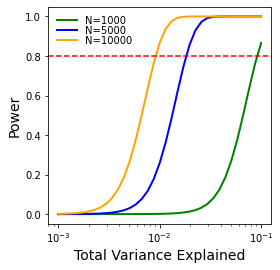

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

j = 100
tevs = np.logspace(-3, -1, 35)
nreps = 10

rare_var = RareVariantBurdenPower()

colors = {1000: "green", 5000: "blue", 10000: "orange"}
for n in [1000, 5000, 10000]:
    power_appx1 = np.zeros(tevs.size)
    for i,t in tqdm(enumerate(tevs)):
        power_appx1[i] = rare_var.power_burden_model1(n=n, j=j, tev=t, prop_risk=0.8, prop_causal=1.0, alpha=1e-6)
    ax.plot(tevs, power_appx1, color=colors[n], lw=2, label=f'N={n}')

ax.legend(frameon=False, labelspacing=0)
ax.set_xscale('log')
ax.set_xlabel(r'Total Variance Explained', fontsize=14)
ax.set_ylabel(r'Power', fontsize=14)
ax.axhline(y=0.80, color='red', linestyle='--')

35it [00:00, 1146.98it/s]
35it [00:00, 1222.02it/s]
35it [00:00, 1222.07it/s]


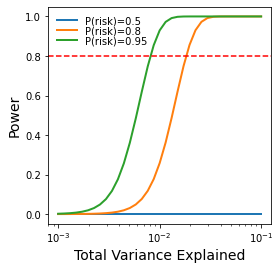

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))

rare_var = RareVariantBurdenPower()

j = 100
tevs = np.logspace(-3, -1, 35)
for p in [0.5, 0.8, 0.95]:
    power_appx1 = np.zeros(tevs.size)
    for i,t in tqdm(enumerate(tevs)):
        power_appx1[i] = rare_var.power_burden_model1(n=5000, j=j, tev=t, prop_risk=p, prop_causal=1.0, alpha=1e-6)
    ax.plot(tevs, power_appx1, lw=2, label=f'P(risk)={p}')

ax.legend(frameon=False, labelspacing=0)
ax.set_xscale('log')
ax.set_xlabel(r'Total Variance Explained', fontsize=14)
ax.set_ylabel(r'Power', fontsize=14)
ax.axhline(y=0.80, color='red', linestyle='--')

100%|████████████████████████████████████████████| 3/3 [00:03<00:00,  1.03s/it]


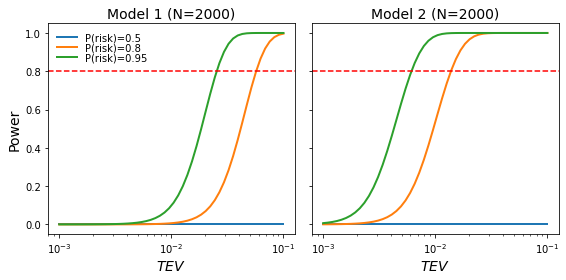

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

rare_var = RareVariantBurdenPower()

tevs = np.logspace(-3, -1, 50)
n=2000

for p in tqdm([0.5, 0.8, 0.95]):
    power_appx1 = [rare_var.power_burden_model1_real(n=n, nreps=10, tev=t, prop_risk=p, prop_causal=0.8).mean() for t in tevs]
    power_appx2 = [rare_var.power_burden_model2_real(n=n, nreps=10, test="SKAT", tev=t, prop_risk=p, prop_causal=0.8).mean() for t in tevs]
    
    ax[0].plot(tevs, power_appx1, lw=2, label=f'P(risk)={p}')
    ax[1].plot(tevs, power_appx2, lw=2)
    
ax[0].legend(frameon=False, labelspacing=0)
ax[0].set_xscale('log')
ax[0].set_ylabel(r'Power', fontsize=14)
for i in [0,1]:
    ax[i].axhline(y=0.80, color='red', linestyle='--')
    ax[i].set_title(f'Model {i+1} (N={n})', fontsize=14);
    ax[i].set_xlabel(r'$TEV$', fontsize=14)

    
plt.tight_layout()

In [5]:
# Lets set the power to detect a recent signal from INHBE Exome results
# https://www.nature.com/articles/s41467-022-32398-7/tables/1
beta_target = 0.17
p_target = 0.0009
j = 29
tev = 2*p_target*(1-p_target)*(beta_target**2)
rare_var = RareVariantBurdenPower()
prop_causal = 0.90
prop_risk = 0.90

opt_N = rare_var.opt_n_burden_model1(j=j, tev=tev, power=0.80, alpha=3.5e-7, prop_causal=1.0, prop_risk=1.0)
print(opt_N, tev, j)

677952.8592538438 5.197318200000001e-05 29


In [6]:
# Lets set the power to detect a recent signal from PLIN1 Exome results
# https://www.nature.com/articles/s41467-022-32398-7/tables/1
beta_target = 0.2
p_target = 0.0025
j = 118
tev = 2*p_target*(1-p_target)*(beta_target**2)
rare_var = RareVariantBurdenPower()

opt_N = rare_var.opt_n_burden_model1(j=j, tev=tev, power=0.80, alpha=3.5e-7, prop_causal=1.0, prop_risk=1.0)
print(opt_N, tev, j)

176618.3826637611 0.00019950000000000005 118
